In [ ]:

!git clone https://github.com/rcuocolo/PROSTATEx_masks

Cloning into 'PROSTATEx_masks'...
remote: Enumerating objects: 5026, done.
remote: Counting objects: 100% (376/376), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 5026 (delta 353), reused 195 (delta 179), pack-reused 4650
Receiving objects: 100% (5026/5026), 902.72 MiB | 27.81 MiB/s, done.
Resolving deltas: 100% (3701/3701), done.
Updating files: 100% (2565/2565), done.


Stroing all the images paths in images

Downloading the dataset from the github repo

In [ ]:

import os
folder_path="/content/PROSTATEx_masks/Files/prostate/Images"
all_images_paths = sorted(os.listdir(folder_path))
print(len(all_images_paths))

204


Stroing all the masks paths in masks

In [ ]:

import os
folder_path="/content/PROSTATEx_masks/Files/prostate/mask_prostate"
all_masks_paths = sorted(os.listdir(folder_path))
print(len(all_masks_paths))

204


Converting the nii format image to png and formatting the patient id

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np


# Function to convert nii format of image to png. We take the middle slice of the image and convert to png

def nii_to_png(nii_file_path, png_file_path):
    # Load the NIfTI image
    nii_img = nib.load(nii_file_path)

    # Get the image data as a numpy array
    nii_data = nii_img.get_fdata()

    # Normalize pixel values to [0, 1] range
    max_val = np.max(nii_data)
    min_val = np.min(nii_data)
    nii_data = (nii_data - min_val) / (max_val - min_val)

    # Convert to 8-bit unsigned integer (0-255)
    nii_data = (nii_data * 255).astype(np.uint8)

    # Plot the image
    plt.imshow(nii_data[:, :, nii_data.shape[2] // 2], cmap='gray')
    plt.axis('off')

    # Save as PNG
    plt.savefig(png_file_path, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.close()

# Getting the patient id from the image file name
def format_patient_id(filename):
    # Extract the patient ID
    patient_id = filename.split("-")[1].split(".")[0]

    # Pad the patient ID with leading zeros if necessary
    padded_patient_id = patient_id.zfill(4)

    return padded_patient_id

def get_patient_id(filename):
    patient_id = filename.split("_")[0].split("-")[1]
    return patient_id


Making two new folder: image and masks. The folders have png images of the respective nii image and masks

In [ ]:
import os

# Assuming /images and /masks directories exist
images_dir = "images"
masks_dir = "masks"


# Create directories if they don't exist
os.makedirs(images_dir, exist_ok=True)
os.makedirs(masks_dir, exist_ok=True)

for i in range(len(all_images_paths)):
    image_output_path = os.path.join(images_dir, get_patient_id(all_images_paths[i]) + ".png")
    mask_output_path = os.path.join(masks_dir, format_patient_id(all_masks_paths[i]) + ".png")
    nii_to_png("/content/PROSTATEx_masks/Files/prostate/Images/"+all_images_paths[i], image_output_path)
    nii_to_png("/content/PROSTATEx_masks/Files/prostate/mask_prostate/"+all_masks_paths[i], mask_output_path)


Storing the png images name in a list

In [ ]:
import os
folder_path="/content/images"
all_images_paths = sorted(os.listdir(folder_path))
print(len(all_images_paths))

204


In [ ]:
import os
folder_path="/content/masks"
all_masks_paths = sorted(os.listdir(folder_path))
print(len(all_masks_paths))

204


Generating paths from the image name

In [ ]:
import os

folder_path = "/content/images"
images_paths = sorted(os.listdir(folder_path), key=lambda x: int(x.split(".")[0]))
for i in range(len(images_paths)):
    images_paths[i] = "/content/images/"+images_paths[i]
print(images_paths[0:10])


['/content/images/0000.png', '/content/images/0001.png', '/content/images/0002.png', '/content/images/0003.png', '/content/images/0004.png', '/content/images/0005.png', '/content/images/0006.png', '/content/images/0007.png', '/content/images/0008.png', '/content/images/0009.png']


In [ ]:
import os

folder_path = "/content/masks"
masks_paths = sorted(os.listdir(folder_path), key=lambda x: int(x.split(".")[0]))
for i in range(len(masks_paths)):
    masks_paths[i] = "/content/masks/"+masks_paths[i]
print(masks_paths)

['/content/masks/0000.png', '/content/masks/0001.png', '/content/masks/0002.png', '/content/masks/0003.png', '/content/masks/0004.png', '/content/masks/0005.png', '/content/masks/0006.png', '/content/masks/0007.png', '/content/masks/0008.png', '/content/masks/0009.png', '/content/masks/0010.png', '/content/masks/0011.png', '/content/masks/0012.png', '/content/masks/0013.png', '/content/masks/0014.png', '/content/masks/0015.png', '/content/masks/0016.png', '/content/masks/0017.png', '/content/masks/0018.png', '/content/masks/0019.png', '/content/masks/0020.png', '/content/masks/0021.png', '/content/masks/0022.png', '/content/masks/0023.png', '/content/masks/0024.png', '/content/masks/0025.png', '/content/masks/0026.png', '/content/masks/0027.png', '/content/masks/0028.png', '/content/masks/0029.png', '/content/masks/0030.png', '/content/masks/0031.png', '/content/masks/0032.png', '/content/masks/0033.png', '/content/masks/0034.png', '/content/masks/0035.png', '/content/masks/0036.png', 

Train Test split

In [ ]:
test_imgs = images_paths[len(images_paths)-10:]
test_masks = masks_paths[len(masks_paths)-10:]
images_paths = images_paths[:len(images_paths)-10]
masks_paths = masks_paths[:len(masks_paths)-10]

In [ ]:
print(len(test_imgs))
print(len(test_masks))
print(len(images_paths))
print(len(masks_paths))

10
10
194
194


In [ ]:
from tensorflow import keras
from transformers import TFSamModel, SamProcessor
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.ops.numpy_ops import np_config
from PIL import Image
import requests
import glob
import os

Initializing the model and the processor. Model is downloaded from hugging face

In [ ]:
model = TFSamModel.from_pretrained("facebook/sam-vit-base")
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/375M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFSamModel.

All the weights of TFSamModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFSamModel for predictions without further training.


preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

Testing code for image masks bounding box generator

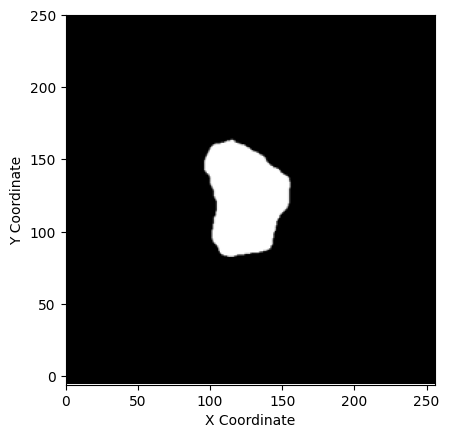

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def display_image_with_coordinates(image_path):
    # Load the image
    image = Image.open(image_path)

    # Resize the image to 256x256
    image = image.resize((256, 256))

    # Convert the image to a NumPy array
    image = np.array(image)

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Set the x and y axis limits based on the image dimensions
    height, width, _ = image.shape
    ax.set_xlim(0, width)
    ax.set_ylim(height, 0)  # Reverse the y-axis to match the image orientation

    # Set the x and y axis labels to represent coordinates
    ax.set_xticks(np.arange(0, width, 50))  # Adjust step size as needed
    ax.set_xticklabels(np.arange(0, width, 50))  # Adjust step size as needed
    ax.set_xlabel('X Coordinate')

    ax.set_yticks(np.arange(0, height, 50))  # Adjust step size as needed
    ax.set_yticklabels(np.arange(0, height, 50)[::-1])  # Adjust step size as needed and reverse y-axis labels
    ax.set_ylabel('Y Coordinate')

    # Show the plot
    plt.show()

# Test the function
image_path = "/content/masks/0000.png"  # Replace "your_image_path.jpg" with the path to your image
display_image_with_coordinates(image_path)

Generator function for image and masks

      - It convert the image to RGB format with size, 1024*1024
      - It convert the masks into "1" format with size, 256*256
      - It finds the bounding box of the mask
      - It generates a input vector for the training

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

class Generator:
    """Generator class for processing the images and the masks for SAM fine-tuning."""

    def __init__(self, image_paths, mask_paths, processor):
        self.image_paths = sorted(image_paths)
        self.mask_paths = sorted(mask_paths)
        self.processor = processor

    @staticmethod
    def preprocess_image(image_path):
        image = Image.open(image_path)
        image = image.convert("RGB")
        # Resize image
        # print(f"Image data shape before: {image.size}")
        resized_image = image.resize((1024, 1024))  # Adjust the dimensions as needed
        # print(f"Image data shape after: {resized_image.size}")
        return resized_image

    @staticmethod
    def preprocess_mask(mask_path):
        threshold=128
        mask = Image.open(mask_path)
        mask = mask.convert("L")
        mask = mask.point(lambda x: 0 if x < threshold else 255, mode='1')
        resized_mask = mask.resize((256, 256))

        return resized_mask

    def __call__(self):
        for image_path, mask_path in zip(self.image_paths, self.mask_paths):
            image = self.preprocess_image(image_path)
            # print(mask_path)
            # display_image_with_coordinates(mask_path)
            ground_truth_mask = self.preprocess_mask(mask_path)
            image = np.array(image)
            ground_truth_mask = np.array(ground_truth_mask)

            prompt = self.get_bounding_box(ground_truth_mask)


            if not prompt:
                continue

            # prepare image and prompt for the model
            inputs = self.processor(image, input_boxes=[[prompt]], return_tensors="np")

            # remove batch dimension which the processor adds by default
            inputs = {k: v.squeeze(0) for k, v in inputs.items()}

            # add ground truth segmentation
            inputs["ground_truth_mask"] = ground_truth_mask

            yield inputs

    @staticmethod
    def get_grayscale_channel(ground_truth_map):
        # Check each channel individually to find the one with the highest variance
        variances = [np.var(ground_truth_map[:, :, i]) for i in range(ground_truth_map.shape[2])]
        grayscale_channel = np.argmax(variances)
        return grayscale_channel



    @staticmethod
    def get_bounding_box(ground_truth_map):
        if np.sum(ground_truth_map) == 0:
            return None
        # get bounding box from mask
        y_indices, x_indices = np.where(ground_truth_map > 0)

        x_min, x_max = np.min(x_indices), np.max(x_indices)
        y_min, y_max = np.min(y_indices), np.max(y_indices)


        # add perturbation to bounding box coordinates
        H, W = ground_truth_map.shape
        x_min = max(0, x_min )
        x_max = min(W, x_max )
        y_min = max(0, y_min )
        y_max = min(H, y_max )
        bbox = [x_min, y_min, x_max, y_max]

        return bbox

Creating TensorFlow dataset from custom generator with defined output signature.

In [ ]:
# Define the output signature of the generator class.
output_signature = {
    "pixel_values": tf.TensorSpec(shape=(3, None, None), dtype=tf.float32),
    "original_sizes": tf.TensorSpec(shape=(None,), dtype=tf.int64),
    "reshaped_input_sizes": tf.TensorSpec(shape=(None,), dtype=tf.int64),
    "input_boxes": tf.TensorSpec(shape=(None, None), dtype=tf.float64),
    "ground_truth_mask": tf.TensorSpec(shape=(None, None), dtype=tf.int32),
}

# Prepare the dataset object.
train_dataset_gen = Generator(images_paths,masks_paths, processor)
train_ds = tf.data.Dataset.from_generator(
    train_dataset_gen, output_signature=output_signature
)

Caching, shuffling, batching, and prefetching training dataset efficiently.

In [ ]:
auto = tf.data.AUTOTUNE
batch_size = 2
shuffle_buffer = 4

train_ds = (
    train_ds.cache()
    .shuffle(shuffle_buffer)
    .batch(batch_size)
    .prefetch(buffer_size=auto)
)

Iterating through train_ds, printing keys, shapes, types, and TensorFlow status.

In [ ]:
sample = next(iter(train_ds))
for k in sample:
    print(k, sample[k].shape, sample[k].dtype, isinstance(sample[k], tf.Tensor))

pixel_values (2, 3, 1024, 1024) <dtype: 'float32'> True
original_sizes (2, 2) <dtype: 'int64'> True
reshaped_input_sizes (2, 2) <dtype: 'int64'> True
input_boxes (2, 1, 4) <dtype: 'float64'> True
ground_truth_mask (2, 256, 256) <dtype: 'int32'> True


In [ ]:
# initialize SAM model and optimizer
sam = TFSamModel.from_pretrained("facebook/sam-vit-base")
optimizer = keras.optimizers.Adam(1e-5)

for layer in sam.layers:
    if layer.name in ["vision_encoder", "prompt_encoder"]:
        layer.trainable = False


All PyTorch model weights were used when initializing TFSamModel.

All the weights of TFSamModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFSamModel for predictions without further training.


Dice loss funtion for SAM model.

In [ ]:
def dice_loss(y_true, y_pred, smooth=1e-5):
    y_pred = tf.sigmoid(y_pred)
    reduce_axis = list(range(2, len(y_pred.shape)))
    if batch_size > 1:
        # reducing spatial dimensions and batch
        reduce_axis = [0] + reduce_axis
    intersection = tf.reduce_sum(y_true * y_pred, axis=reduce_axis)
    y_true_sq = tf.math.pow(y_true, 2)
    y_pred_sq = tf.math.pow(y_pred, 2)

    ground_o = tf.reduce_sum(y_true_sq, axis=reduce_axis)
    pred_o = tf.reduce_sum(y_pred_sq, axis=reduce_axis)
    denominator = ground_o + pred_o
    # calculate DICE coefficient
    loss = 1.0 - (2.0 * intersection + 1e-5) / (denominator + 1e-5)
    loss = tf.reduce_mean(loss)

    return loss

Training code for SAM model, the inputs are passed, and according to the loss outputted, the weights are updated.

In [ ]:
@tf.function
def train_step(inputs):
    with tf.GradientTape() as tape:
        # pass inputs to SAM model
        outputs = sam(
            pixel_values=inputs["pixel_values"],
            input_boxes=inputs["input_boxes"],
            multimask_output=False,
            training=True,
        )

        predicted_masks = tf.squeeze(outputs.pred_masks, 1)
        ground_truth_masks = tf.cast(inputs["ground_truth_mask"], tf.float32)

        # calculate loss over predicted and ground truth masks
        loss = dice_loss(tf.expand_dims(ground_truth_masks, 1), predicted_masks)
        # update trainable variables
        trainable_vars = sam.trainable_variables
        grads = tape.gradient(loss, trainable_vars)
        optimizer.apply_gradients(zip(grads, trainable_vars))

        return loss

Training on 3 epochs ( if >3 the model will overtrain )

In [ ]:
for epoch in range(3):
    for inputs in train_ds:
        loss = train_step(inputs)
    print(f"Epoch {epoch + 1}: Loss = {loss}")

Epoch 1: Loss = 0.44023239612579346
Epoch 2: Loss = 0.09731841087341309
Epoch 3: Loss = 0.06255310773849487


Saving the model

In [ ]:
tf.saved_model.save(sam, "sam_model")

Preprocessing functions for testing images

In [ ]:
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.convert("RGB")
    # Resize image
    # print(f"Image data shape before: {image.size}")
    resized_image = image.resize((1024, 1024))  # Adjust the dimensions as needed
    # print(f"Image data shape after: {resized_image.size}")
    return resized_image
def preprocess_mask(mask_path):
    threshold=128
    mask = Image.open(mask_path)
    mask = mask.convert("L")
    mask = mask.point(lambda x: 0 if x < threshold else 255, mode='1')
    resized_mask = mask.resize((256, 256))

    return resized_mask

In [ ]:
np_config.enable_numpy_behavior()

def get_first_mask(masks):
    if len(masks) > 0:
        return masks[0]
    else:
        return None


def change_infer_mask(gen_mask):
    image = gen_mask.numpy()
    # Transpose the image tensor to (256, 256, 3)
    image = image.transpose(2, 3, 1, 0).squeeze()
    # Scale pixel values to 0-255
    image = ((image - image.min()) / (image.max() - image.min()) * 255).astype(np.uint8)
    # Convert to PIL image
    pil_image = Image.fromarray(image)
    # Convert to grayscale mode
    gray_image = pil_image.convert('L')
    threshold=180
    mask = gray_image.point(lambda x: 0 if x < threshold else 255, mode='1')
    return mask



def calculate_iou(mask1, mask2):
    intersection = np.logical_and(mask1, mask2)
    union = np.logical_or(mask1, mask2)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30 / 255, 144 / 255, 255 / 255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_masks_on_image(raw_image, masks, scores):
    if len(masks[0].shape) == 4:
        final_masks = np.squeeze(masks[0])
    if scores.shape[0] == 1:
        final_scores = np.squeeze(scores)

    nb_predictions = scores.shape[-1]
    fig, axes = plt.subplots(1, nb_predictions, figsize=(15, 15))

    for i, (mask, score) in enumerate(zip(final_masks, final_scores)):
        mask = np.array(mask)
        axes[i].imshow(np.array(raw_image))
        show_mask(mask, axes[i])
        axes[i].title.set_text(f"Mask {i+1}, Score: {score:.3f}")
        axes[i].axis("off")
    plt.show()

In [ ]:
# Load another image for inference.
idx = 50

raw_image_inference = preprocess_image(images_paths[idx])
original_mask=preprocess_mask(masks_paths[idx])

# process the image and infer
preprocessed_img = processor(raw_image_inference)
outputs = sam(preprocessed_img)

Testing the model on a random image from the dataset

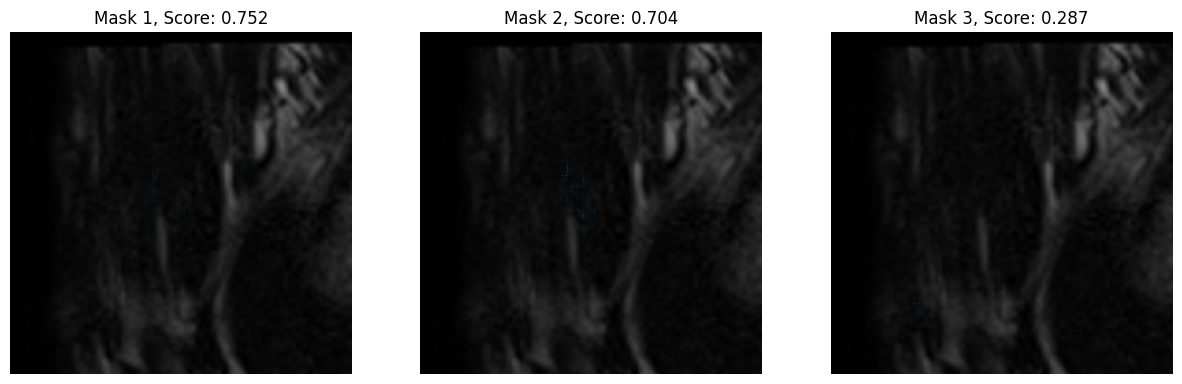

0.18501440922190202

In [ ]:
infer_masks = outputs["pred_masks"]
iou_scores = outputs["iou_scores"]
show_masks_on_image(raw_image_inference, masks=infer_masks, scores=iou_scores)
calculate_iou(change_infer_mask(get_first_mask(infer_masks)),original_mask)

Looping in the test images and finding the iou score and the output mask

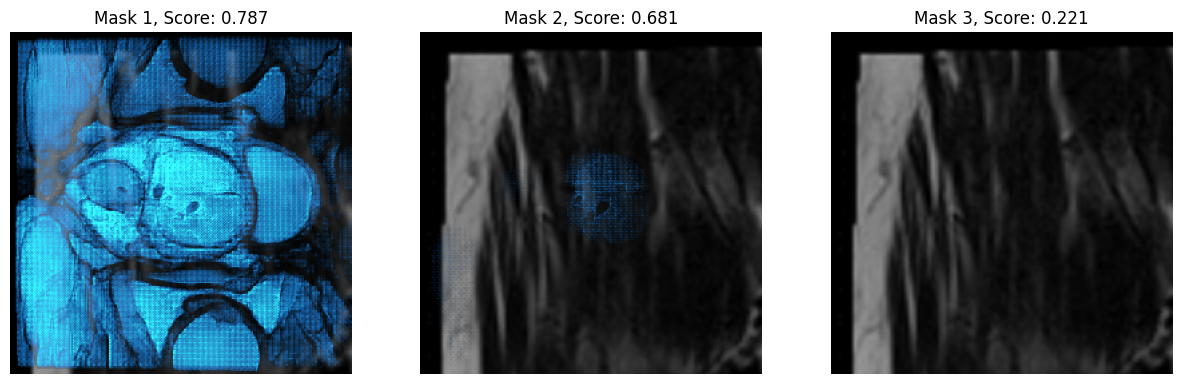

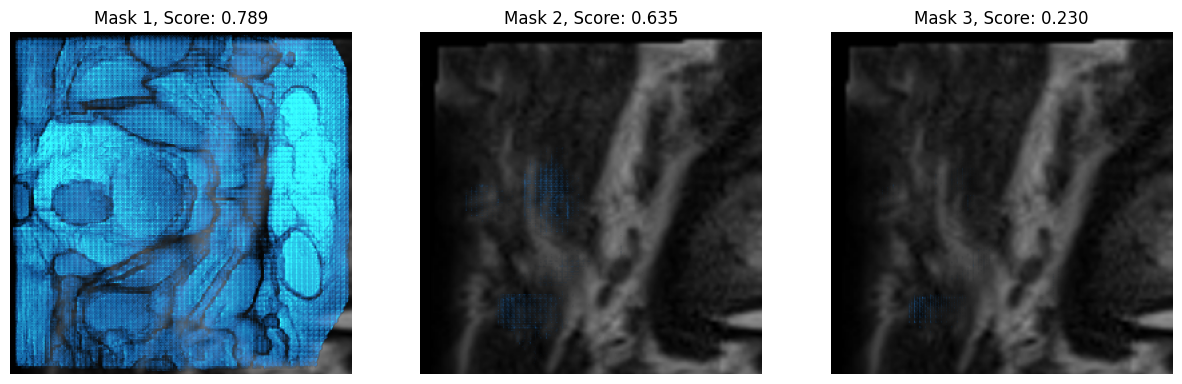

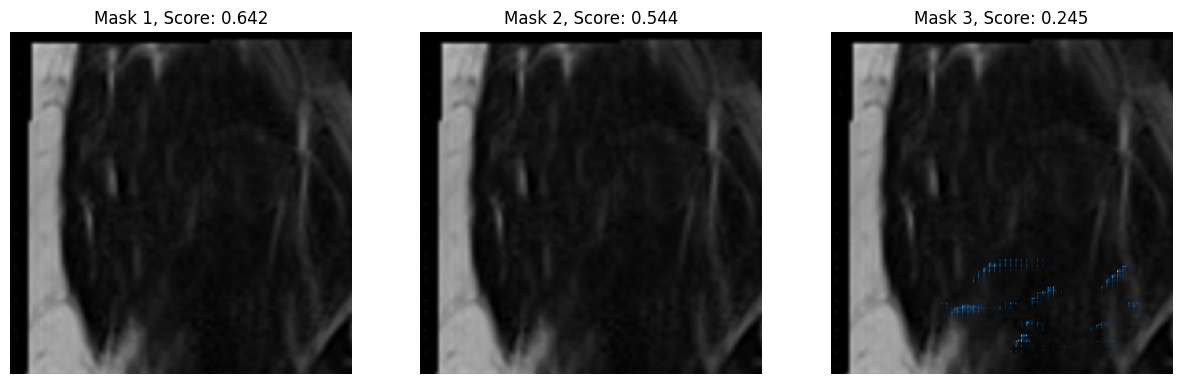

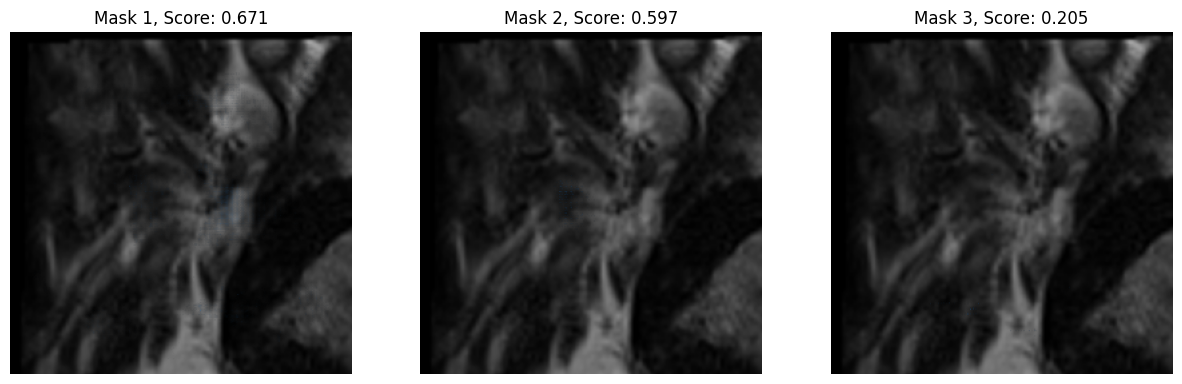

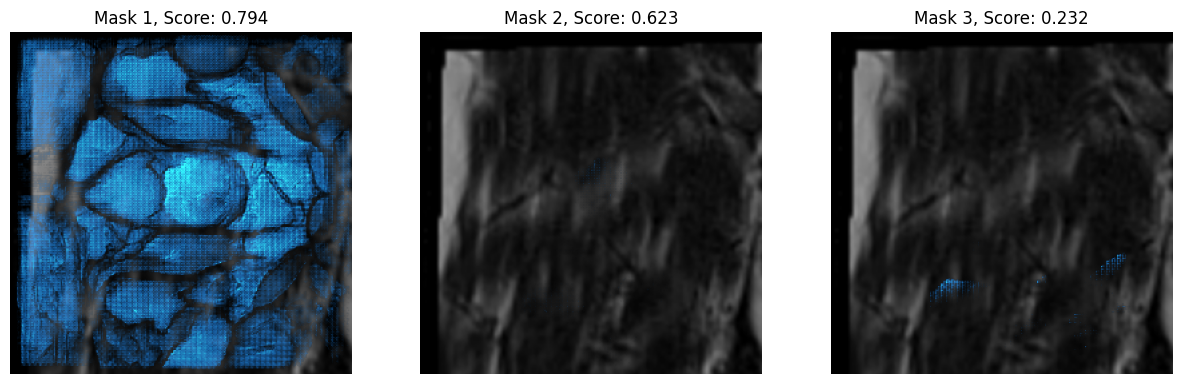

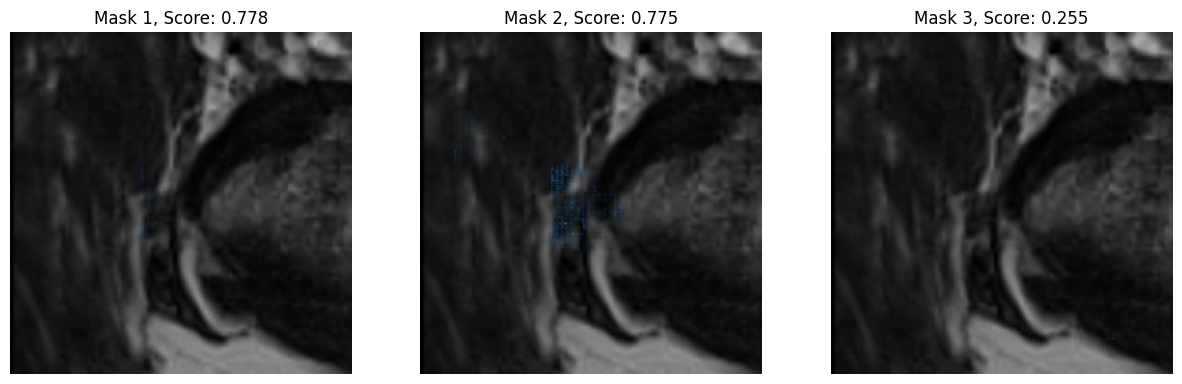

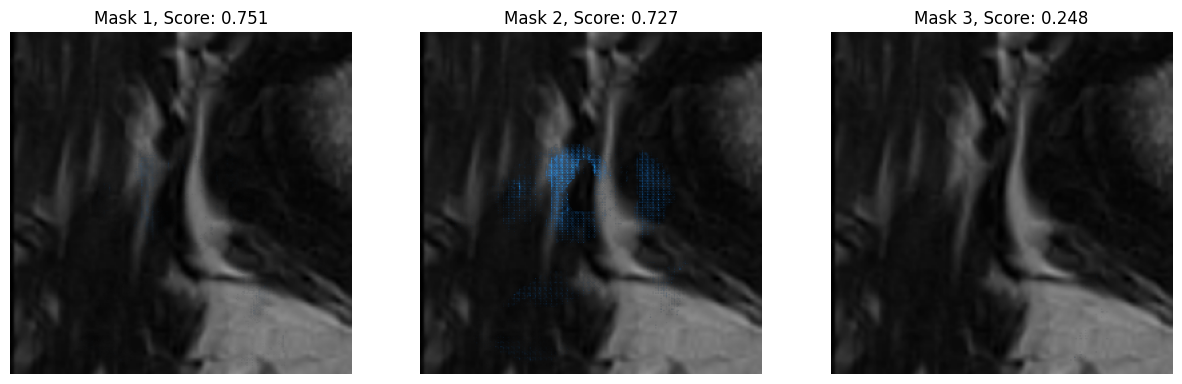

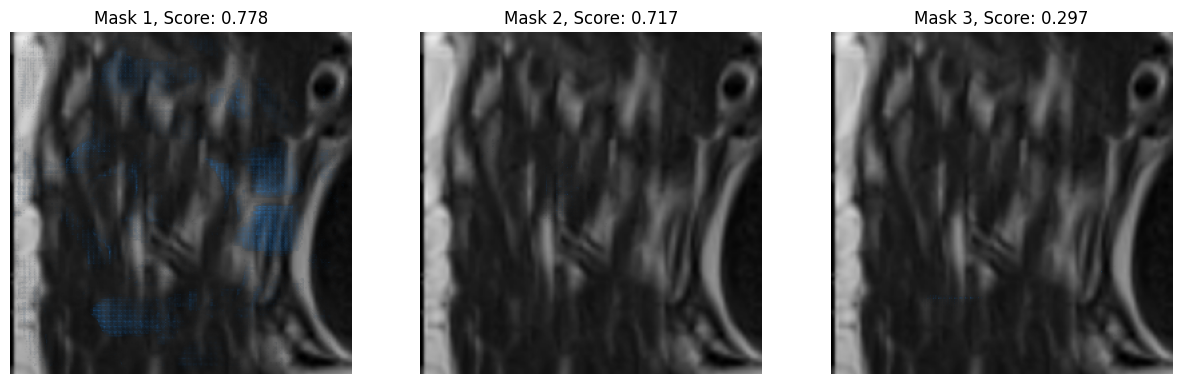

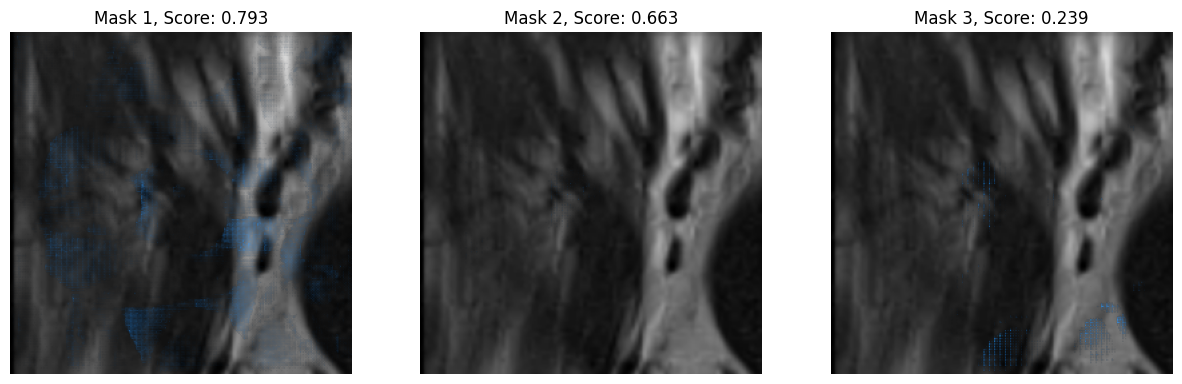

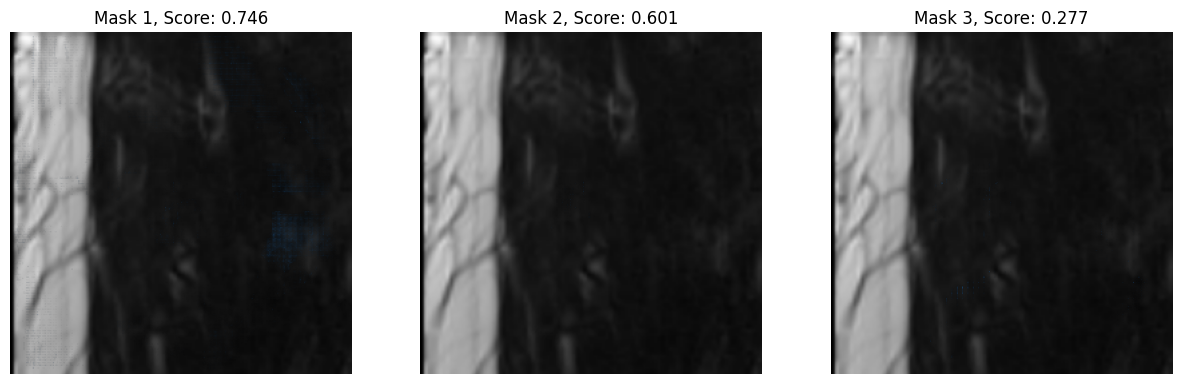

In [ ]:
def change_infer_mask_test(gen_mask,threshold):
    image = gen_mask.numpy()
    # Transpose the image tensor to (256, 256, 3)
    image = image.transpose(2, 3, 1, 0).squeeze()
    # Scale pixel values to 0-255
    image = ((image - image.min()) / (image.max() - image.min()) * 255).astype(np.uint8)
    # Convert to PIL image
    pil_image = Image.fromarray(image)
    # Convert to grayscale mode
    gray_image = pil_image.convert('L')
    mask = gray_image.point(lambda x: 0 if x < threshold else 255, mode='1')
    return mask

scores_test=[]
for i in range(len(test_imgs)):
    image=preprocess_image(test_imgs[i])
    preprocessed_img=processor(image)
    outputs=sam(preprocessed_img)
    infer_masks = outputs["pred_masks"]
    iou_scores = outputs["iou_scores"]
    show_masks_on_image(image, masks=infer_masks, scores=iou_scores)
    maximum_score=0
    for threshold in range(150,250):
        iou_score_on_mask=calculate_iou(change_infer_mask_test(get_first_mask(infer_masks),threshold),preprocess_mask(test_masks[i]))
        maximum_score=max(maximum_score,iou_score_on_mask)
    scores_test.append(maximum_score)


Generating the test result, plotting graphs and finding other IOU metrics

In [ ]:
print(scores_test)

[0.49531459170013387, 0.3545651745217906, 0.3626425855513308, 0.350597609561753, 0.26791430682098005, 0.4596451058958214, 0.31713900134952766, 0.4822322322322322, 0.31969357249626307, 0.29336734693877553]


In [ ]:
s=sum(scores_test)
print(s/10)

0.3703111527068608


In [ ]:
def change_infer_mask_train(gen_mask,threshold):
    image = gen_mask.numpy()
    # Transpose the image tensor to (256, 256, 3)
    image = image.transpose(2, 3, 1, 0).squeeze()
    # Scale pixel values to 0-255
    image = ((image - image.min()) / (image.max() - image.min()) * 255).astype(np.uint8)
    # Convert to PIL image
    pil_image = Image.fromarray(image)
    # Convert to grayscale mode
    gray_image = pil_image.convert('L')
    mask = gray_image.point(lambda x: 0 if x < threshold else 255, mode='1')
    return mask

scores_train=[]
for i in range(len(images_paths)):
    image=preprocess_image(images_paths[i])
    preprocessed_img=processor(image)
    outputs=sam(preprocessed_img)
    infer_masks = outputs["pred_masks"]
    iou_scores = outputs["iou_scores"]
    maximum_score=0
    for threshold in range(150,250):
        iou_score_on_mask=calculate_iou(change_infer_mask_train(get_first_mask(infer_masks),threshold),preprocess_mask(masks_paths[i]))
        maximum_score=max(maximum_score,iou_score_on_mask)
    scores_train.append(maximum_score)

In [ ]:
s=sum(scores_train)
print(s/len(scores_train))

0.4516274861169719


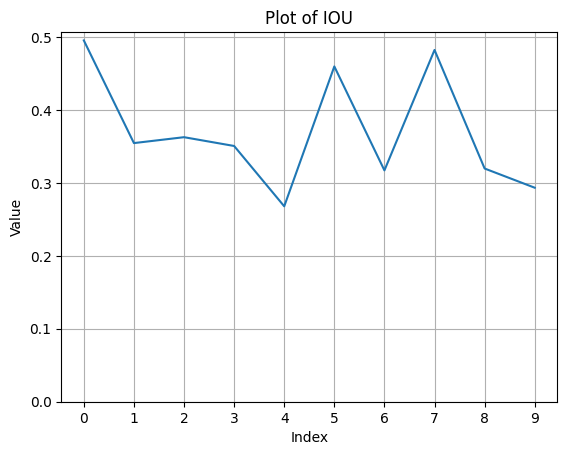

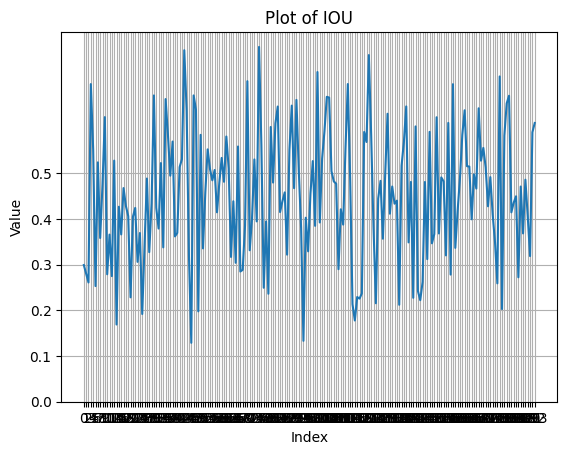

In [ ]:
import matplotlib.pyplot as plt

def plot_values(data):
    plt.plot(data)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Plot of IOU')
    plt.grid(True)
    plt.xticks(ticks=range(len(data)), labels=[str(i) for i in range(len(data))])
    plt.yticks(ticks=[i/10.0 for i in range(6)])  # Set y ticks from 0 to 1 in increments of 0.1
    plt.show()


# Plot the values
plot_values(scores_test)
plot_values(scores_train)




In [ ]:
print(max(scores_train))
print(max(scores_test))

0.7773186409550046
0.49531459170013387


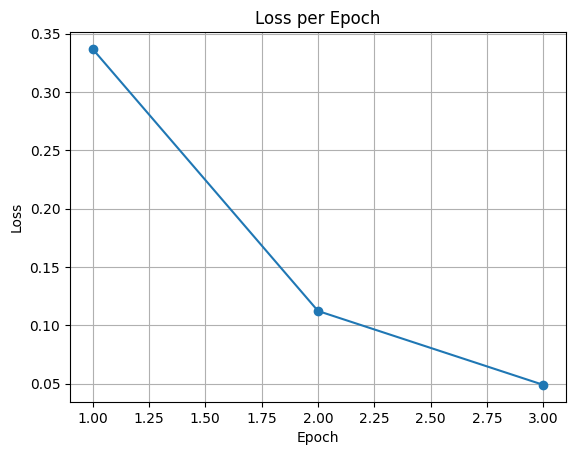

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(loss_values):
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, marker='o', linestyle='-')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss per Epoch')
    plt.grid(True)
    plt.show()

# Loss values extracted from the provided strings
loss_values = [0.336941123008728, 0.11222600936889648, 0.04882115125656128]

# Plot the loss values
plot_loss(loss_values)
